## Assignment 1A 
The following code is to show the basics of convolution where we use kernels over the image to extract features. Below are Vertical edge detection kernel, Horizontal edge detection kernel, Kernel to detect 45 degree angled lines, Identity kernel, Sharpen kernel and Blur kernel.

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
# Some sample images
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")
# image = url_to_image("https://i.stack.imgur.com/8SX80.png")
# image = url_to_image("http://clipart-library.com/images/yckrdgxdi.png")
# image = url_to_image("https://mindgamesatbyb.files.wordpress.com/2008/11/illusions_donssite0059.jpg")

Original Image


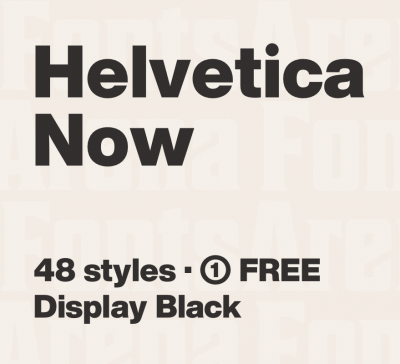

In [0]:
# The Original Image
from google.colab.patches import cv2_imshow
print("Original Image")
cv2_imshow(image)

Canny Edge Detection


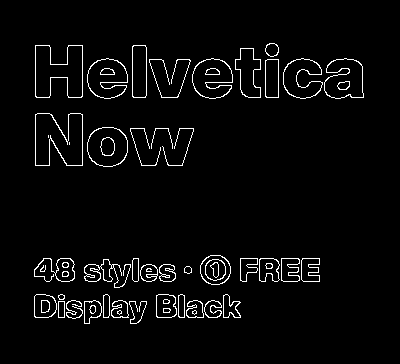

In [0]:
# Sample - to show canny edge detection
edges = cv2.Canny(image,100,200)
print("Canny Edge Detection")
cv2_imshow(edges)

## Identity Kernel
The Identity Kernel leaves the image unchanged after convolution. 

Sample matrix * Identity Kernel 
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

The image after convolving with Identity Kernel


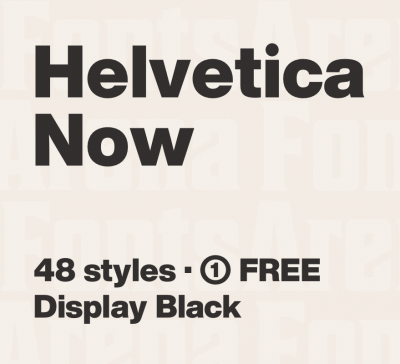

In [0]:
# IDENTITY KERNEL
i_x = np.array([[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                [0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0],
                [0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0],
                [0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0],
                [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0],
                [0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0],
                [0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0],
                [0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]])

i_kernel = np.float32([[0,0,0],
                       [0,1,0],
                       [0,0,0]]) 

dst = cv2.filter2D(i_x,-1,i_kernel)
print("Sample matrix * Identity Kernel \n",dst)
dst = cv2.filter2D(image,-1,i_kernel)
print("\nThe image after convolving with Identity Kernel")
cv2_imshow(dst)

## Vertical Edge Detecting Kernel
This kernel detects and removes the vertical edges from the image. It detects the vertical lines by showing the difference in adjacent pixels from right to left or vice-versa. The sample matrix is provided to see the way in which it detects the vertical edge, after convolving with v_kernel.

Sample matrix * Vertical Kernel 
 [[  0.   0.   0. -20.   0.  20.   0.   0.]
 [  0.   0.   0. -20.   0.  20.   0.   0.]
 [  0.   0.   0. -30.   0.  30.   0.   0.]
 [  0.   0.   0. -30.   0.  30.   0.   0.]
 [  0.   0.   0. -30.   0.  30.   0.   0.]
 [  0.   0.   0. -30.   0.  30.   0.   0.]
 [  0.   0.   0. -20.   0.  20.   0.   0.]
 [  0.   0.   0. -20.   0.  20.   0.   0.]]

The image after convolving with Vertical Kernel


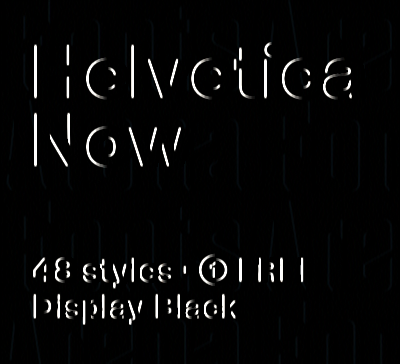

In [0]:
# VETRICAL KERNEL
v_x = np.array([[0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.]])

v_kernel = np.float32([[1,0,-1],
                      [1,0,-1],
                      [1,0,-1]]) 

dst = cv2.filter2D(v_x,-1,v_kernel)
print("Sample matrix * Vertical Kernel \n",dst)
dst = cv2.filter2D(image,-1,v_kernel)
print("\nThe image after convolving with Vertical Kernel")
cv2_imshow(dst)

## Horizontal Edge Detecting Kernel
This kernel detects and removes the horizontal edges from the image. It detects the horizontal lines by showing the difference in adjacent pixels from bottom to up or vice-versa. The sample matrix is provided to see the way in which it detects the horizontal edge, after convolving with h_kernel.

Sample matrix * Horizontal Kernel 
 [[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [ 20.  30.  40.  40.  40.  40.  30.  20.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [-20. -30. -40. -40. -40. -40. -30. -20.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]

The image after convolving with Horizontal Kernel


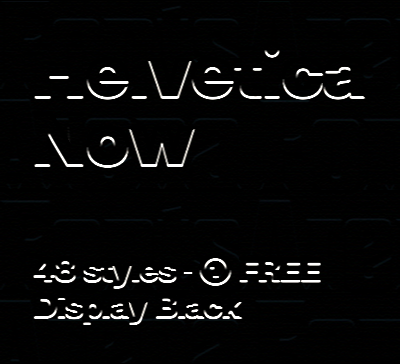

In [0]:
# HORIZONTAL KERNEL
h_x = np.array([[0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,10.,10.,10.,10.,10.,10.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.]])

h_kernel = np.float32([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]]) 

dst = cv2.filter2D(h_x,-1,h_kernel)
print("Sample matrix * Horizontal Kernel \n",dst)
dst = cv2.filter2D(image,-1,h_kernel)
print("\nThe image after convolving with Horizontal Kernel")
cv2_imshow(dst)

## 45 degree Edge Detecting Kernel
This kernel detects and removes the 45 degree edges from the image. It detects the 45 degree lines by showing the difference in adjacent pixels from bottom left to top right or vice-versa. The sample matrix is provided to see the way in which it detects the 45 degree edge, after convolving with d_kernel.

Sample matrix * 45* Edge Kernel 
 [[ 0. -1. -2.  0.  0.  0.  0.  0.]
 [ 1.  0. -2. -2.  0.  0.  0.  0.]
 [ 2.  2.  0. -2. -2.  0.  0.  0.]
 [ 0.  2.  2.  0. -2. -2.  0.  0.]
 [ 0.  0.  2.  2.  0. -2. -2.  0.]
 [ 0.  0.  0.  2.  2.  0. -2. -2.]
 [ 0.  0.  0.  0.  2.  2.  0. -1.]
 [ 0.  0.  0.  0.  0.  2.  1.  0.]]

The image after convolving with 45* Edge Kernel


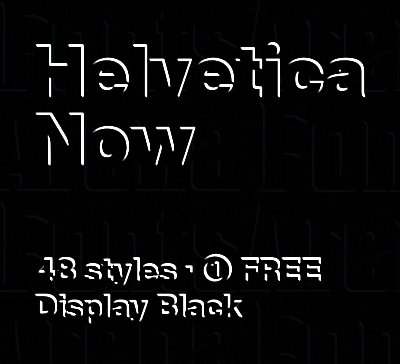

In [0]:
# 45* KERNEL ( \ )
d_x = np.array([[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
               [0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0],
               [0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0],
               [0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0],
               [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0],
               [0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0],
               [0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0],
               [0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]])

d_kernel = np.float32([[0,1,2],
                     [-1,0,1],
                     [-2,-1,0]]) 

dst = cv2.filter2D(d_x,-1,d_kernel)
print("Sample matrix * 45* Edge Kernel \n",dst)
dst = cv2.filter2D(image,-1,d_kernel)
print("\nThe image after convolving with 45* Edge Kernel")
cv2_imshow(dst)

## Sharpen Kernel
This kernel emphasizes difference in adjacent pixel values. It is basically boosting the edges found in the image. The sample matrix is provided to see the way in which it sharpens the image, after convolving with s_kernel.

Sample matrix * Sharpen Kernel 
 [[  0.   0.   0.   0. -20.   0.   0.   0.]
 [  0.   0.   0. -10.  40. -10.   0.   0.]
 [  0.   0.   0. -10.  30. -10.   0.   0.]
 [  0.   0.   0. -10.  30. -10.   0.   0.]
 [  0.   0.   0. -10.  30. -10.   0.   0.]
 [  0.   0.   0. -10.  30. -10.   0.   0.]
 [  0.   0.   0. -10.  40. -10.   0.   0.]
 [  0.   0.   0.   0. -20.   0.   0.   0.]]

The image after convolving with Sharpen Kernel


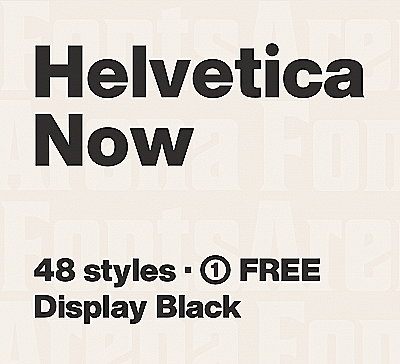

In [0]:
# SHARPEN KERNEL
s_x = np.array([[0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.]])

s_kernel = np.float32([[0,-1,0],
                      [-1,5,-1],        
                      [0,-1,0]])  

dst = cv2.filter2D(s_x,-1,s_kernel)
print("Sample matrix * Sharpen Kernel \n",dst)
dst = cv2.filter2D(image,-1,s_kernel)
print("\nThe image after convolving with Sharpen Kernel")
cv2_imshow(dst)

## Blur Kernel
This kernel de-emphasizes difference in adjacent pixel values. It is basically lowering the pixel values the edges found in the image. The sample matrix is provided to see the way in which it blurs the image, after convolving with b_kernel.

Sample matrix * Blur Kernel 
 [[0.    0.    0.    1.25  2.5   1.25  0.    0.   ]
 [0.    0.    0.    1.875 3.75  1.875 0.    0.   ]
 [0.    0.    0.    2.5   5.    2.5   0.    0.   ]
 [0.    0.    0.    2.5   5.    2.5   0.    0.   ]
 [0.    0.    0.    2.5   5.    2.5   0.    0.   ]
 [0.    0.    0.    2.5   5.    2.5   0.    0.   ]
 [0.    0.    0.    1.875 3.75  1.875 0.    0.   ]
 [0.    0.    0.    1.25  2.5   1.25  0.    0.   ]]

The image after convolving with Blur Kernel


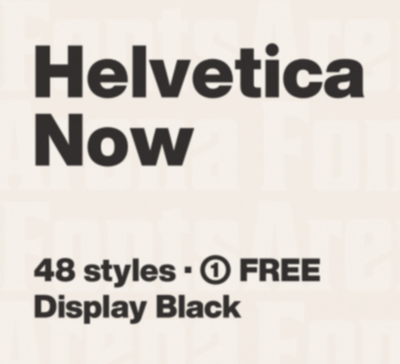

In [0]:
# BLUR KERNEL
b_x = np.array([[0.,0.,0.,0.,0.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,10.,0.,0.,0.],
               [0.,0.,0.,0.,0.,0.,0.,0.]])

b_kernel = np.float32([[0.0625,0.125,0.0625],
                      [0.125,0.25,0.125],        
                      [0.0625,0.125,0.0625]]) 

dst = cv2.filter2D(b_x,-1,b_kernel)
print("Sample matrix * Blur Kernel \n",dst)
dst = cv2.filter2D(image,-1,b_kernel)
print("\nThe image after convolving with Blur Kernel")
cv2_imshow(dst)